In [ ]:
import os
ROOT = "/content/drive/MyDrive/001_SUNNY_BHAVEEN_CHANDRA/001_My_Classes/DLCVNLP/Live Lectures Material DLCVNLP April 17th batch/Day 08 May 22/live demo"
os.chdir(ROOT)
assert ROOT == os.getcwd()

## A simple classifier using Keras's Sequential API

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns

### Working on mnist dataset - 

* This dataset contains handwritten digits. 
* It has 10 classes i.e. 0 to 9
* Each data point is 2D array of 28x28 size.
* Also known as hello world dataset for ANN

[image source](https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png)

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

In [2]:
# Keras has already contains mnist dataset 
# Loading mnist data using Keras

mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
print(f"data type of X_train_full: {X_train_full.dtype},\nshape of X_train_full: {X_train_full.shape}")

data type of X_train_full: uint8,
shape of X_train_full: (60000, 28, 28)


### Observe the training when we do no scale. 

In [4]:
# create a validation data set from the full training data 
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range
# X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
X_valid, X_train = X_train_full[:5000]/255., X_train_full[5000:]/255.

y_valid, y_train = y_train_full[:5000]/255., y_train_full[5000:]/255.

# scale the test set as well
X_test = X_test / 255.



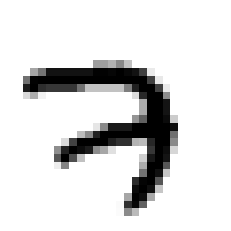

In [5]:
# lets view the first data point of X_train
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


<AxesSubplot:>

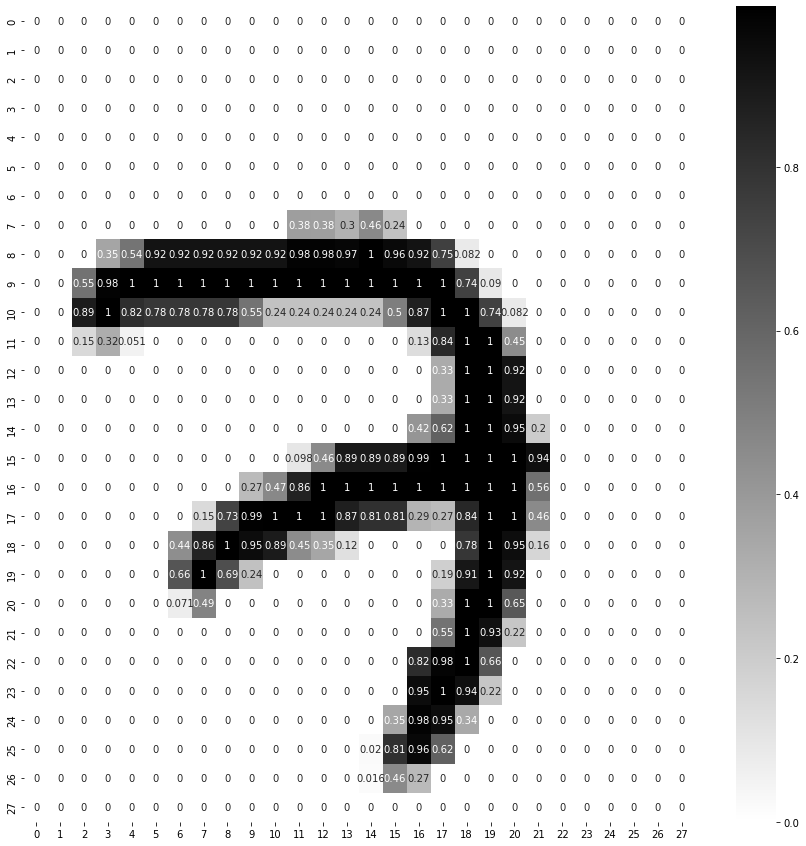

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[0], annot=True, cmap="binary")

In [7]:
# actual value of y_train
y_train[0]

0.027450980392156862

In [8]:
LAYERS = [tf.keras.layers.Flatten(input_shape=[28, 28], name="inputLayer"),
          tf.keras.layers.Dense(300, activation="relu", name="hiddenLayer1"),
          tf.keras.layers.Dense(100, activation="relu", name="hiddenLayer2"),
          tf.keras.layers.Dense(10, activation="softmax", name="outputLayer")]

model_clf = tf.keras.models.Sequential(LAYERS)

#### Altenative 1

```python
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

```

#### Alternative 2

```python
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])
```

### For custom weights initialiser or setting weights 
refer [here](https://keras.io/api/layers/base_layer/#setweights-method)

In [9]:
model_clf.layers

In [10]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputLayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenLayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenLayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputLayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# firsLayer * secondLayer + bias
784*300 + 300, 300*100+100, 100*10+10

(235500, 30100, 1010)

In [12]:
# Total parameters to be trained -
sum((235500, 30100, 1010))

266610

In [13]:
hidden1 = model_clf.layers[1]
hidden1.name

'hiddenLayer1'

In [14]:
model_clf.get_layer(hidden1.name) is hidden1

True

In [15]:
# hidden1.set_weights(hidden1.get_weights()) # to set weights

In [16]:
type(hidden1.get_weights())

list

In [17]:
hidden1.get_weights()

[array([[ 0.02826004, -0.05197888, -0.03782679, ...,  0.06646487,
         -0.04419844, -0.00800534],
        [-0.03635327,  0.03444927,  0.0310323 , ...,  0.04085725,
         -0.06779319,  0.04713682],
        [-0.04579701, -0.04390878,  0.0722394 , ...,  0.01993978,
          0.06098361, -0.03851663],
        ...,
        [ 0.07395576, -0.03721173,  0.02315414, ...,  0.00197167,
         -0.06349318,  0.01330779],
        [-0.02208739,  0.00252087,  0.01618686, ..., -0.02972435,
          0.0556221 ,  0.02372025],
        [ 0.01746357,  0.05447869, -0.00163555, ...,  0.05640534,
          0.00399903,  0.00638007]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
print("shape\n",weights.shape, "\n")

weights


shape
 (784, 300) 



array([[ 0.02826004, -0.05197888, -0.03782679, ...,  0.06646487,
        -0.04419844, -0.00800534],
       [-0.03635327,  0.03444927,  0.0310323 , ...,  0.04085725,
        -0.06779319,  0.04713682],
       [-0.04579701, -0.04390878,  0.0722394 , ...,  0.01993978,
         0.06098361, -0.03851663],
       ...,
       [ 0.07395576, -0.03721173,  0.02315414, ...,  0.00197167,
        -0.06349318,  0.01330779],
       [-0.02208739,  0.00252087,  0.01618686, ..., -0.02972435,
         0.0556221 ,  0.02372025],
       [ 0.01746357,  0.05447869, -0.00163555, ...,  0.05640534,
         0.00399903,  0.00638007]], dtype=float32)

In [20]:
print("shape\n", biases.shape)

biases

shape
 (300,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
LOSS_FUNCTION = "sparse_categorical_crossentropy" # use => tf.losses.sparse_categorical_crossentropy
OPTIMIZER = "SGD" # or use with custom learning rate=> tf.keras.optimizers.SGD(0.02)
METRICS = ["accuracy"]

model_clf.compile(loss=LOSS_FUNCTION,
              optimizer=OPTIMIZER,
              metrics=METRICS)



#### Alternatively 
```python
model_clf.compile(loss=tf.losses.sparse_categorical_crossentropy,
               optimizer=tf.keras.optimizers.SGD(0.02),
               metrics=["accuracy"])
```

In [22]:
# 1719*30, X_train.shape, 55000/32, batch size=32 by default

### scaled  and epochs increased
### note if we don't scaled down the data complexity will be increased , and the 
#####  first epochs steps will be very high


In [25]:
# EPOCHS = 30
EPOCHS = 10

VALIDATION_SET = (X_valid, y_valid)

history = model_clf.fit(X_train, y_train, epochs=EPOCHS,
                    validation_data=VALIDATION_SET)

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.5419e-05 - accuracy: 0.0990 - val_loss: 2.2439e-05 - val_accuracy: 0.0958
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.4127e-05 - accuracy: 0.0990 - val_loss: 2.1314e-05 - val_accuracy: 0.0958
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.2957e-05 - accuracy: 0.0990 - val_loss: 2.0295e-05 - val_accuracy: 0.0958
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 2.1893e-05 - accuracy: 0.0990 - val_loss: 1.9365e-05 - val_accuracy: 0.0958
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 2.0922e-05 - accuracy: 0.0990 - val_loss: 1.8514e-05 - val_accuracy: 0.0958
Epoch 6/10
1719/1719 [==============================] - 8s 4ms/step - loss: 2.0031e-05 - accuracy: 0.0990 - val_loss: 1.7733e-05 - val_accuracy: 0.0958
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 1.9211e-05 -

In [26]:
import time
import os

def saveModel_path(model_dir="SAVED_MODELS"):
    os.makedirs(model_dir, exist_ok=True)
    fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")    
    model_path = os.path.join(model_dir, fileName)
    print(f"your model will be saved at the following location\n{model_path}")
    return model_path


In [27]:
UNIQUE_PATH = model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS\Model_2023_01_20_16_15_27_.h5


In [28]:
history.params


{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [29]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.000025,0.098982,0.000022,0.0958
1,0.000024,0.098982,0.000021,0.0958
2,0.000023,0.098982,0.000020,0.0958
3,0.000022,0.098982,0.000019,0.0958
4,0.000021,0.098982,0.000019,0.0958
5,0.000020,0.098982,0.000018,0.0958
6,0.000019,0.098982,0.000017,0.0958
7,0.000018,0.098982,0.000016,0.0958
8,0.000018,0.098982,0.000016,0.0958
9,0.000017,0.098982,0.000015,0.0958


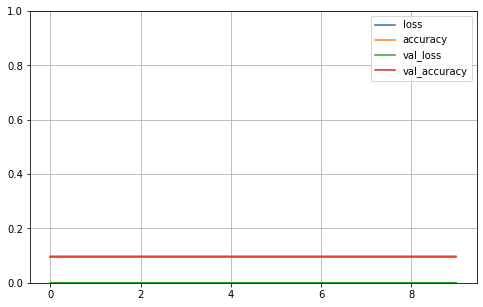

In [30]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model_clf.evaluate(X_test, y_test)

313/313 [==============================] - 2s 3ms/step - loss: 18.3417 - accuracy: 0.0980


[18.3416805267334, 0.09799999743700027]

In [32]:
X_new = X_test[:3]
y_proba = model_clf.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 160ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [33]:
y_pred = np.argmax(model_clf.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 65ms/step


array([0, 0, 0], dtype=int64)

In [34]:
y_test_new = y_test[:3]

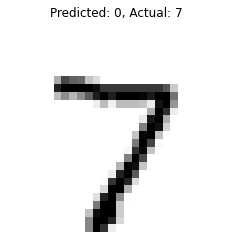

------------------------------------------------------------


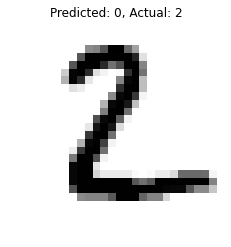

------------------------------------------------------------


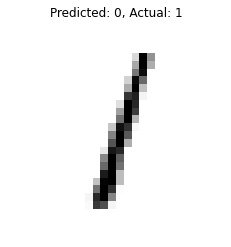

------------------------------------------------------------


In [35]:
for data, pred, actual in zip(X_new, y_pred, y_test_new):
    plt.imshow(data, cmap="binary")
    plt.title(f"Predicted: {pred}, Actual: {actual}")
    plt.axis('off')
    plt.show()
    print("---"*20)

In [36]:
weights, biases = hidden1.get_weights()

In [37]:
weights

array([[ 0.02826004, -0.05197888, -0.03782679, ...,  0.06646487,
        -0.04419844, -0.00800534],
       [-0.03635327,  0.03444927,  0.0310323 , ...,  0.04085725,
        -0.06779319,  0.04713682],
       [-0.04579701, -0.04390878,  0.0722394 , ...,  0.01993978,
         0.06098361, -0.03851663],
       ...,
       [ 0.07395576, -0.03721173,  0.02315414, ...,  0.00197167,
        -0.06349318,  0.01330779],
       [-0.02208739,  0.00252087,  0.01618686, ..., -0.02972435,
         0.0556221 ,  0.02372025],
       [ 0.01746357,  0.05447869, -0.00163555, ...,  0.05640534,
         0.00399903,  0.00638007]], dtype=float32)

In [38]:
biases

array([ 6.04159432e-03,  1.39069809e-02,  4.78102081e-03, -7.43721751e-03,
       -8.41039140e-03,  1.66783691e-03, -1.87286409e-03,  4.09486853e-02,
        3.20181288e-02,  5.80145454e-04, -3.59819736e-03,  9.63997841e-03,
       -5.20119118e-03,  5.64199686e-02, -2.06217213e-04, -1.64766621e-03,
        2.44149975e-02, -6.84796076e-04,  4.34702821e-02, -3.18066776e-03,
       -5.36140939e-03, -4.73219296e-03,  2.60406081e-03, -9.32216004e-04,
       -1.10898504e-03, -1.09586054e-02,  1.81293115e-02, -6.24110270e-03,
        4.67737322e-04, -3.99916759e-03,  4.95798625e-02,  2.05724500e-03,
        1.54825009e-03,  1.30379628e-02, -8.65606591e-03, -6.88299444e-03,
        1.96367167e-02,  1.95658373e-04,  5.61805256e-03, -4.50845517e-04,
        2.54625659e-02, -3.79383634e-03,  2.44284910e-03,  3.54310982e-02,
        2.13151686e-02, -5.09625627e-03,  3.76490341e-03,  1.30051328e-02,
        8.29647016e-03,  1.78245921e-02,  7.63983885e-03,  3.40326428e-02,
        1.69469919e-02,  